This notebook is part of the Metaheuristic class, written by Plobner Guillaume, Puydebois Etienne and Savigneux Melchior<br>

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Shuffled Frog Leaping Algorithm</div>

<br>

1. [Shuffled Frog Leaping Algorithm](#sec1)
2. [Application in solving 01 knapsack problem](#sec2)

## 1. <a id="sec1"></a> Shuffled Frog Leaping Algorithm

The Shuffled Frog Leaping method is based on observing, imitating and modelling the behaviour of a group of frogs when searching for a specific location.

<img src="SFA.png" width="600px">


The population consists of a set of frogs (solutions), **partitioned into subsets, called memeplexes**. The different memeplexes are performing a **local search**. Within each memeplex, a frog can be influenced by the others, and evolve through a process of memetic evolution. Then, frogs are passed among memeplexes in a **shuffling process**. The local search and the shuffling processes continue until a **convergence criteria** is satisfied.
<br><br>

To get into details, an **initial population of frogs is created randomly**. A frog i (a solution) is represented as :<br> 

$$X_{i} =(x_{i,1}, x_{i,2}, ..., x_{i,j})$$ 

Afterwards, the frogs are **sorted in a descending order** according to their fitness. Then, the population is divided into m memeplexes, each containing n frogs. As described by the drawing, the first frog goes to the first memeplex, the second frog goes to the second memeplex, frog m goes to the $m^{th}$ memeplex, and frog m+1 goes back to the first memeplex, and so on.

<img src="partitioned_memeplexes.png" width="500px">

**Local Search**

Within each memeplex, the frogs with the best and the worst fitnesses are identified as $X_{b}$ and $X_{w}$ , respectively. Also, the frog with the global best fitness is identified as $X_{g}$. Then, a process is applied to improve only the frog with the worst fitness (not all frogs) in each cycle. Accordingly, the position of the frog with the worst fitness is adjusted as follows:

$$D_{i} = Rand()\times(X_{b}-X_{w}),$$

where $Rand()$ is a random number between 0 and 1, and $D_{i}$ is the change in the $i^{th}$ frog position and new position is given by: 

$$X_{w}(new) = X_{w} + D_{i}\\
-D_{max} \leq D_{i} \leq D_{max},$$

where $D_{max}$ is the maximum allowed change in a frog position. If this process produces a better solution, it replaces the worst frog. Otherwise, calculations above are repeated but with respect to the global best frog (i.e. $X_{g}$ replaces $X_{b}$). If no improvement possible in this case, then a new solution is randomly generated to replace that frog. The calculations then continue for a specific number of iterations. As mentionned previously, memeplexes are then combined in a shuffling process, and the local search and the shuffling processes continue until a convergence criteria is satisfied.

**The pseudocode for the Shuffled Frog Leaping Algorithm (discrete) is given below.**



<pre><code>
<div class="alert alert-warning">
**Pseudocode for Shuffled Frog Leaping Algorithm** 


Generate random population of solutions (frogs)
**for** each individual i in population **do**: 
    calculate fitness(i) 
**end for**
Sort the population in descending order of their fitness 
Divide the population into m memeplexes
**for** each memeplex **do**
    **LOCAL SEARCH**
    Determine the best and worst frogs
    Improve the worst frog position
    Repeat for a specific number of iterations
**end for**
**SHUFFLING PROCESS**
Combine the evolved memeplexes
Sort the population in descending order of their fitness
**if** criteria is satisfied **then**
    Return best solution
**end if**
</div>
</pre></code>


<img src="algo_shuffled.png" width="400px">

<table><tr><td>***Fig. 1 Flowchart Shuffled Frog Leaping Algorithm*** </td></tr></table>




<div class="alert alert-success">
Process of Shuffled frog Leaping.
<ul>
<li> Population consists in a set of frogs (solutions)
<li> Partioned into subsets referred as memeplexes
<li> Each memplex are performing a local search
<li> The local search and the suffling processes continue until defined criteria is satisfied 
</ul>
</div>

# 2. <a id="sec2"></a>Application in solving 01 knapsack problem



In [2]:
import numpy as np
from matplotlib import pyplot as plt

**Datasets**

In [3]:
#f1 : dimension 10 : nb bag = 2**10 = 1024
w_f1 = [95, 4, 60, 32, 23, 72, 80, 62, 65, 46] 
p_f1 = [55, 10, 47, 5, 4, 50, 8, 61, 85, 87]
b_f1 = 269.

#f2 : dimension 20 : nb bag = 2**20 = 1048576
w_f2 = [92, 4, 43, 83, 84, 68, 92, 82, 6, 44, 32, 18, 56, 83, 25, 96, 70, 48, 14, 58]
p_f2 = [44, 46, 90, 72, 91, 40, 75, 35, 8, 54, 78, 40, 77, 15, 61, 17, 75, 29, 75, 63]
b_f2 = 878.

#f3 : dimension 4 : nb bag = 2**4 = 16
w_f3 = [6, 5, 9, 7]
p_f3 = [9, 11, 13, 15]
b_f3 = 20.

#f4 : dimension 4 : nb bag = 2**4 = 16
w_f4 = [2, 4, 6, 7]
p_f4 = [6, 10, 12, 13]
b_f4 = 11.

#f5 : dimension 15 : nb bag = 2**15 = 32768
w_f5 = [56.358531, 80.87405, 47.987304, 89.59624, 74.660482, 85.894345, 51.353496, 1.498459, 36.445204, 16.589862, 44.569231, 0.466933, 37.788018, 57.118442, 60.716575]
p_f5 = [0.125126, 19.330424, 58.500931, 35.029145, 82.284005, 17.41081, 71.050142, 30.399487, 9.140294, 14.731285, 98.852504, 11.908322, 0.89114, 53.166295, 60.176397]
b_f5 = 375.


#f6 : dimension 10 : nb bag = 2**10 = 1024
w_f6 = [30, 25, 20, 18, 17, 11, 5, 2, 1, 1]
p_f6 = [20, 18, 17, 15, 15, 10, 5, 3, 1, 1]
b_f6 = 60.

#f7 : dimension 7 : nb bag = 2**7 = 128
w_f7 = [31, 10, 20, 19, 4, 3, 6]
p_f7 = [70, 20, 39, 37, 7, 5, 10]
b_f7 = 50.

#f8 : dimension 23 : nb bag = 2**23 = 8388608
w_f8 = [983, 982, 981, 980, 979, 978, 488, 976, 972, 486, 486, 972, 972, 485, 485, 969, 966, 483, 964, 963, 961, 958, 959]
p_f8 = [81,980, 979, 978, 977, 976, 487, 974, 970, 485, 485, 970, 970, 484, 484, 976, 974, 482, 962, 961, 959, 958, 857]
b_f8 = 10000.

#f9 : dimension 5 : nb bag = 2**5 = 32
w_f9 = [15, 20, 17, 8, 31]
p_f9 = [33, 24, 36, 37, 12]
b_f9 = 80.

#f10 : dimension 20 : nb bag 2**20 = 1048576
w_f10 = [84, 83, 43, 4, 44, 6, 82, 92, 25, 83, 56, 18, 58, 14, 48, 70, 96, 32, 68, 92]
p_f10 = [91, 72, 90, 46, 55, 8, 35, 75, 61, 15, 77, 40, 63, 75, 29, 75, 17, 78, 40, 44]
b_f10 = 879.

**Solutions**

In [4]:
#f1 : solution : 
sol_f1 = ([0,1,1,1,0,0,0,1,1,1], 295) 

#f2 : solution : 
sol_f2 = ([1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1], 1024)

#f3 : solution : 
sol_f3 = ([1,1,0,1], 35)
#f4 : solution : 
sol_f4 = ([0,1,0,1], 23)

#f5 : solution : 
sol_f5 = ([0,0,1,0,1,0,1,1,0,1,1,1,0,1,1], 481.0694)

#f6 : solution : 
sol_f6 = ([0,0,1,0,1,1,1,1,1,1], 52)

#f7 : solution : 
sol_f7 = ([1,0,0,1,0,0,0], 107)

#f8 : solution : 
sol_f8 = ([1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0], 9767)

#f9 : solution : 
sol_f9 = ([1,1,1,1,0], 130)

#f10: solution : 
sol_f10 = ([1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1], 1025)

**Choix du problème et définition des paramètres**

In [5]:
################### You only have to touch this cell variables to change the setting
#### MAIN CELL #### When you're ready, just run all the cells
################### Go to the end of the notebook to check results

#choose your problem number here 
num_of_problem = 5

# define all the global problem parameters
weight = globals()['w_f'+str(num_of_problem)]
profit = globals()['p_f'+str(num_of_problem)]
object_number = len(profit)
max_weight = globals()['b_f'+str(num_of_problem)]
solution = globals()['sol_f'+str(num_of_problem)]

####################
# HYPER PARAMETRES #
####################

iteration_limit = 50                       # nombre limite d'iteration globales (critere d'arret)
memeplexe_iterations = 10                  # nombre de 'sous' d'iterations 
bag_number = 200                            # nombre de sacs 
memeplexe_number = 20                       # nombre de sous-ensembles
memeplexe_size = 10                         # taille des sous ensembles
min_random = 0                             # valeur de D minimale ( borne inf loi uniforme)
max_random = 1                             # valeur de D maximale ( borne sup loi uniforme)
pm = 0.1                                   # proba de muter le sac i a chaque iteration
max_mutate_index = bag_number              # doit etre inf ou egal a bag_number (entier)
min_mutate_index = 0 #np.int(bag_number/2) # doit etre entre 0 et max_mutate_number (entier)
nb_object_max = int(object_number/4)       # nombre d'objets mutés sur les bag 'mutants'

**Quelques fonctions...**

In [6]:
#Calcul du poids d'un sac
def weight_of(bag):
    return np.vdot(bag,weight)

#Calcul du profit d'un sac
def profit_of(bag):
    return np.vdot(bag,profit)

#Trier les sacs en fonction de leur profit
def sort_bag(bag_list):
    bag_list.sort(key=lambda x : -x[1])
    return bag_list

#Création d'une liste de sacs
def create_bag_list(bag_number):
    bag_list = []

    for i in range(bag_number):
        bag_weight = max_weight+1
        while bag_weight>max_weight:
            new_bag = np.random.randint(2, size=(1,object_number)).tolist()[0]
            bag_weight = weight_of(new_bag)
        
        #Evaluate profit of the new bag
        bag_profit = profit_of(new_bag)
        bag_list.append((new_bag, bag_profit))
    return sort_bag(bag_list)

In [7]:
#Création d'un dictionnaire - key : memeplex_number, value : memeplexes sorted in descending order by profit -
def create_dict(bag_list,memeplexe_number):
    memeplexe_set = {}
    for i in range(memeplexe_number):
        memeplexe_i = []
        for j in range(memeplexe_size):
            memeplexe_i.append(bag_list[i+j*memeplexe_number])
        sort_bag(memeplexe_i)
        memeplexe_set.update({i : memeplexe_i})
    return memeplexe_set

bag_list = create_bag_list(bag_number)
memeplexe_set = create_dict(bag_list, memeplexe_number) 
memeplexe_set[0]

[([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], 390.84749899999997),
 ([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1], 312.56752199999994),
 ([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], 290.42328999999995),
 ([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], 272.252572),
 ([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1], 245.381024),
 ([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0], 232.587664),
 ([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], 216.83400999999998),
 ([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1], 191.83935200000002),
 ([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1], 160.11536),
 ([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], 127.48497)]

In [8]:
#Améliorer le mauvais sac
def update_object_i(i,best_memeplexe_bag,bad_memeplexe_bag):
    rand = np.random.uniform(min_random,max_random)
    D = np.round(rand*(best_memeplexe_bag[0][i]-bad_memeplexe_bag[0][i]))
    t = D + bad_memeplexe_bag[0][i]
    if t<=0: bad_memeplexe_bag[0][i]= 0
    elif t>0 and t<1: bad_memeplexe_bag[0][i]= np.round(t)
    elif t>=1: bad_memeplexe_bag[0][i]= 1
    
#Mettre à jour le memeplexe en améliorer les mauvais sac
def update_bad_bag(memeplexe):
    best_memeplexe_bag = memeplexe[0]
    bad_memeplexe_bag = memeplexe[-1]
    print('\nbag:', bad_memeplexe_bag)
    bag_w = max_weight+1
    while bag_w>max_weight:
        for i in range(object_number):
            update_object_i(i,best_memeplexe_bag,bad_memeplexe_bag) 
        bag_w = weight_of(bad_memeplexe_bag[0])
    memeplexe[-1] = (bad_memeplexe_bag[0], profit_of(bad_memeplexe_bag[0]))
    print('was replaced by:')
    print('bag:', memeplexe[-1])
    print('\n')
    memeplexe = sort_bag(memeplexe)

In [9]:
def improve_memeplexe(memeplexe,memeplexe_iterations):
    profits_initial=[]
    for bag in memeplexe:
        profits_initial.append(bag[1])
    print('profits:',profits_initial)
    
    for i in range(memeplexe_iterations):
        update_bad_bag(memeplexe)
        memeplexe = sort_bag(memeplexe)
        profit=[]
        
        for bag in memeplexe:
            profit.append(bag[1])
        print('new profits:',profit)

def improve_all_memeplexe(memeplexe_set,memeplexe_iterations):
    for key in range(memeplexe_number):
        print('\n########## MEMEPLEXE '+str(key)+' ##########\n')
        improve_memeplexe(memeplexe_set[key],memeplexe_iterations)

#Mutation avec probabilité
def mutate(bag,pm,nb_object_max):
    if np.random.uniform(0,1)<pm:
        weight_of_bag = max_weight+1
        while weight_of_bag>max_weight:
            for i in range(nb_object_max):
                object_to_mutate = np.random.randint(0,10)
                bag[0][object_to_mutate]=abs(bag[0][object_to_mutate]-1)
            bag = (bag[0], profit_of(bag[0]))
            weight_of_bag = weight_of(bag[0])
    return bag

**Résolution du problème 01 knapsack**

In [10]:
i=0

# plots data initialisation
bad_bag_profit_list = [bag_list[-1][1]]
best_bag_profit_list = [bag_list[0][1]]
bad_bag_weight_list = [weight_of(bag_list[-1][0])]
best_bag_weight_list = [weight_of(bag_list[0][0])]

# main algorithm structure :
while i < iteration_limit:
    
    print('\n#########################################')
    print('#########################################')
    print('########### ITERATION '+str(i)+' #################')
    print('#########################################')
    print('#########################################')
    
    print('\n')
    for bag in bag_list:
        print(bag[1])
    
    # intra groups iterations
    improve_all_memeplexe(memeplexe_set,memeplexe_iterations)
    
    # 'deshuffleing'
    new_bag_list = []
    for j in range(memeplexe_number):
        for bag in memeplexe_set[j]:
            new_bag_list.append(bag)
    
    # resorting new bags 
    bag_list = sort_bag(new_bag_list)
    
    # add data to data lists
    bad_bag_profit_list.append(bag_list[-1][1])
    best_bag_profit_list.append(bag_list[0][1])
    bad_bag_weight_list.append(weight_of(bag_list[-1][0]))
    best_bag_weight_list.append(weight_of(bag_list[0][0]))
    
    # mutate some bags according to hyperparameters settings
    for bag_index in range(min_mutate_index,max_mutate_index):
        bag_list[bag_index] = mutate(bag_list[bag_index],pm,nb_object_max)
    
    # reshuffleing
    memeplexe_set = create_dict(bag_list, memeplexe_number) 
    i+=1


#########################################
#########################################
########### ITERATION 0 #################
#########################################
#########################################


390.84749899999997
381.15176799999995
379.619739
372.972807
366.133609
357.17337499999996
354.023865
351.747184
350.218207
345.78692
343.238624
333.005768
327.826777
327.64976999999993
321.362956
320.23071899999997
317.465742
317.261268
316.67531399999996
315.652943
312.56752199999994
311.56346199999996
310.010071
309.469893
309.155552
306.244086
306.082338
305.423138
301.92266499999994
299.33774900000003
298.79756999999995
298.538164
297.247231
294.84847499999995
292.733542
292.657246
292.565691
292.098758
291.042817
290.548416
290.42328999999995
288.988922
287.56370699999997
286.941129
286.642047
286.568804
286.193427
284.057131
280.74282
280.08972400000005
278.988006
278.67366599999997
276.839502
276.73573899999997
276.296274
274.346141
273.818171
273.534349
272.80495499999

bag: ([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0], 328.507339)


new profits: [328.507339, 328.507339, 321.362956, 321.362956, 292.733542, 276.296274, 262.987151, 254.92416199999997, 250.31281399999997, 250.31281399999997]

bag: ([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], 250.31281399999997)
was replaced by:
bag: ([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0], 359.797966)


new profits: [359.797966, 328.507339, 328.507339, 321.362956, 321.362956, 292.733542, 276.296274, 262.987151, 254.92416199999997, 250.31281399999997]

bag: ([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], 250.31281399999997)
was replaced by:
bag: ([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], 250.31281399999997)


new profits: [359.797966, 328.507339, 328.507339, 321.362956, 321.362956, 292.733542, 276.296274, 262.987151, 254.92416199999997, 250.31281399999997]

########## MEMEPLEXE 15 ##########

profits: [320.23071899999997, 292.657246, 274.346141, 249.40946699999998, 234.684286, 219.04660199999998, 201.2878

was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], 380.260628)


new profits: [381.15176799999995, 381.15176799999995, 381.15176799999995, 380.260628, 357.17337499999996, 334.693441, 328.110599, 320.355845, 310.77608499999997, 310.22675200000003]

########## MEMEPLEXE 7 ##########

profits: [381.15176799999995, 355.62913899999995, 333.005768, 320.23071899999997, 310.489211, 297.34488999999996, 289.211708, 278.37458399999997, 262.858973, 239.18881799999997]

bag: ([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1], 239.18881799999997)
was replaced by:
bag: ([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1], 239.18881799999997)


new profits: [381.15176799999995, 355.62913899999995, 333.005768, 320.23071899999997, 310.489211, 297.34488999999996, 289.211708, 278.37458399999997, 262.858973, 239.18881799999997]

bag: ([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1], 239.18881799999997)
was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], 381.15176799999995)


new pr

298.86776299999997
298.86776299999997
294.866786
292.657246
287.56370699999997
271.517075
266.917936
294.582965

########## MEMEPLEXE 0 ##########

profits: [448.20093299999996, 391.738639, 381.15176799999995, 372.972807, 366.133609, 356.83462, 344.505143, 333.005768, 322.949919, 315.09750599999995]

bag: ([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], 315.09750599999995)
was replaced by:
bag: ([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0], 314.206366)


new profits: [448.20093299999996, 391.738639, 381.15176799999995, 372.972807, 366.133609, 356.83462, 344.505143, 333.005768, 322.949919, 314.206366]

bag: ([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0], 314.206366)
was replaced by:
bag: ([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], 448.20093299999996)


new profits: [448.20093299999996, 448.20093299999996, 391.738639, 381.15176799999995, 372.972807, 366.133609, 356.83462, 344.505143, 333.005768, 322.949919]

bag: ([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1], 322.949919)
was replace

bag: ([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 372.450941)


new profits: [428.028199, 421.018097, 411.55125499999997, 390.84749899999997, 390.61861, 386.877041, 379.546495, 372.450941, 369.631031, 359.996338]

bag: ([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1], 359.996338)
was replaced by:
bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], 333.71074600000003)


new profits: [428.028199, 421.018097, 411.55125499999997, 390.84749899999997, 390.61861, 386.877041, 379.546495, 372.450941, 369.631031, 333.71074600000003]

bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], 333.71074600000003)
was replaced by:
bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], 333.71074600000003)


new profits: [428.028199, 421.018097, 411.55125499999997, 390.84749899999997, 390.61861, 386.877041, 379.546495, 372.450941, 369.631031, 333.71074600000003]

bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], 333.71074600000003)
was replaced by:
bag: ([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1], 42

bag: ([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 388.02453599999996)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 469.161046, 450.669881, 450.669881, 435.93859599999996, 428.794213, 414.062928, 401.388592, 391.47618]

bag: ([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1], 391.47618)
was replaced by:
bag: ([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1], 391.47618)


new profits: [481.069368, 481.069368, 469.161046, 450.669881, 450.669881, 435.93859599999996, 428.794213, 414.062928, 401.388592, 391.47618]

bag: ([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1], 391.47618)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 469.161046, 450.669881, 450.669881, 435.93859599999996, 428.794213, 414.062928, 401.388592]

bag: ([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1], 401.388592)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,

new profits: [481.069368, 466.338083, 450.669881, 448.20093299999996, 448.20093299999996, 435.93859599999996, 428.794213, 421.784111, 413.171788, 390.84749899999997]

bag: ([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], 390.84749899999997)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 466.338083, 450.669881, 448.20093299999996, 448.20093299999996, 435.93859599999996, 428.794213, 421.784111, 413.171788]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], 413.171788)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1], 427.903073)


new profits: [481.069368, 481.069368, 466.338083, 450.669881, 448.20093299999996, 448.20093299999996, 435.93859599999996, 428.794213, 427.903073, 421.784111]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], 421.784111)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 466.338083

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1], 454.429761)


new profits: [466.338083, 466.338083, 466.338083, 466.338083, 466.338083, 454.429761, 454.429761, 454.429761, 448.20093299999996, 448.20093299999996]

bag: ([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], 448.20093299999996)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)


new profits: [466.338083, 466.338083, 466.338083, 466.338083, 466.338083, 466.338083, 454.429761, 454.429761, 454.429761, 448.20093299999996]

bag: ([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], 448.20093299999996)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], 413.171788)


new profits: [466.338083, 466.338083, 466.338083, 466.338083, 466.338083, 466.338083, 454.429761, 454.429761, 454.429761, 413.171788]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], 413.171788)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)


new profits: [466.338083

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 475.478377, 469.161046, 466.338083]

########## MEMEPLEXE 11 ##########

profits: [481.069368, 475.478377, 469.161046, 469.161046, 466.338083, 466.338083, 448.20093299999996, 438.761559, 427.903073, 418.115787]

bag: ([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 418.115787)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 475.478377, 469.161046, 469.161046, 466.338083, 466.338083, 448.20093299999996, 438.761559, 427.903073]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1], 427.903073)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 475.478377, 469.161046, 469.161046, 466.338083, 466.338083, 448.20093299999996, 438.761559]

bag: ([0, 0, 1, 0, 1, 


bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 469.161046, 469.161046, 466.338083]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 469.161046, 469.161046]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1], 469.161046)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1], 469.161046)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 469.161046, 469.161046]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1], 469.161046)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1], 469.161046)


481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
384.054078
481.069368
370.84871899999996
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
273.98907399999996
481.069368
481.069368
481.069368
354.023865
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
325.55314699999997
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
370.84871899999996
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
475.478377
475.478377
469.161046
469.161046
469.161046
469.161046
469.161046
405.069124
469.161046
344.209112
469.161046


bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 

481.069368
414.61836500000004
481.069368
481.069368
481.069368
422.56843699999996
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
450.669881
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
297.46086
481.069368
481.069368
481.069368
481.069368
481.069368
416.19617300000004
481.069368
481.069368
466.338083
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
398.785363
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368

########## MEMEPLEXE 0 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 48

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 13 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 360.783715]

bag: ([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1], 360.783715

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)



bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 4 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 431.70873099999994, 408.050783]

bag: ([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], 408.050783)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 431.70873099999994]

bag: ([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], 431.70873099999994)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 16 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 388.760033, 291.244239]

bag: ([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1], 291.244239)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1], 395.28794100000005)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 395.28794100000005, 388.760033]

bag: ([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1], 388.760033)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 395.28794100000005]

bag: ([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 48


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0,

bag: ([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], 357.820368)
was replaced by:
bag: ([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], 357.820368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 450.669881, 360.783715, 357.820368]

bag: ([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], 357.820368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 450.669881, 360.783715]

bag: ([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1], 360.783715)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 450.669881]

bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 450.669881)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 450.669881)



new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## ME


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0,

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)



481.069368
481.069368
481.069368
481.069368
398.785363
481.069368
481.069368
481.069368
481.069368

########## MEMEPLEXE 0 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 12 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 369.722586]

bag: ([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1], 369.722586)
was replaced by:
bag: ([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 325.55314699999997)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 325.55314699999997]

bag: ([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 325.55314699999997)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083]

bag: ([0, 0, 1, 0, 1, 

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 48

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 398.910489]

bag: ([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.910489)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 



new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)



new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## ME

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 17 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 418.115787, 416.19617300000004, 379.619739]

bag: ([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1], 379.619739)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 418.115787, 416.19617300000004]

bag: ([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], 416.19617300000004)
was replaced by:
bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.785363)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 418.115787, 398.785363]

bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.785363)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 41

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)




bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 8 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 327.86034700000005]

bag: ([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 327.86034700000005)
was replaced by:
bag: ([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 327.86034700000005)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 327.86034700000005]

bag: ([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 327.86034700000005)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 410.019226)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 48

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 48

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 

481.069368
481.069368
481.069368
416.19617300000004
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
269.23429
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
306.512649
481.069368
481.069368
481.069368
481.069368

########## MEMEPLEXE 0 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.0


bag: ([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 410.019226)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 13 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.06

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 368.385876]

bag: ([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 368.385876)
was replaced by:
bag: ([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 368.385876)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 368.385876]

bag: ([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 368.385876)
was replaced by:
bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.785363)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 398.785363]

bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.785363)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 


bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 10 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 431.70873099999994]

bag: ([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], 431.70873099999994)
was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], 431.70873099999994)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 431.70873099999994]

bag: ([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], 431.70873099999994)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 4

481.069368
481.069368
481.069368
382.299264
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
450.669881
481.069368
481.069368
475.478377
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
297.46086
481.069368
395.28794100000005
481.069368
336.875515

########## MEMEPLEXE 0 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 

was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 475.478377, 422.56843699999996]

bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)
was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 475.478377, 422.56843699999996]

bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)
was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 475.478377, 422.56843699999996]

bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.06

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069


bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 15 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 414.6

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 12 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,



new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 48

481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
315.652943
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
379.989013
481.069368
278.37458399999997
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
353.654591
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
48

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## ME

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 8 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 416.977446]

bag: ([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1], 416.977446)
was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 422.56843699999996]

bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 48

481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
291.244239
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
365.01358
466.338083
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
265.385907
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
398.785363
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
481.069368
353.779717

########## MEMEPLEXE 0 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 48

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)



new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 

bag: ([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 410.019226)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 422.56843699999996]

########## MEMEPLEXE 16 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 410.019226, 356.147953, 301.934873]

bag: ([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], 301.934873)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], 364.888454)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 410.019226, 364.888454, 356.147953]

bag: ([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1], 356.147953)
was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 42

was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 422.693563, 422.56843699999996]

bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 422.693563]

bag: ([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.693563)
was replaced by:
bag: ([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.693563)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 422.693563]

bag: ([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.693563)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 48

new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 410.144352, 393.319498, 386.54743999999994]

bag: ([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 386.54743999999994)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 410.144352, 393.319498]

bag: ([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1], 393.319498)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], 466.338083)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 410.144352]

bag: ([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], 410.144352)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)



bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)



bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)



bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.785363)
was replaced by:
bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.785363)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 422.56843699999996, 398.785363]

bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.785363)
was replaced by:
bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.785363)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 422.56843699999996, 398.785363]

bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.785363)
was replaced by:
bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.785363)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 466.338083, 422.56843699999996, 398.785363]

bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 398.785363)
was replaced by:
bag: ([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,

was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
was replaced by:
bag: ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368]

########## MEMEPLEXE 15 ##########

profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 422.56843699999996]

bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)
was replaced by:
bag: ([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 422.56843699999996)


new profits: [481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 481.069368, 422.56843699999996]

bag: ([0, 0, 0

In [11]:
print('\nBest bag of each memeplexe after the last iteration:\n')
for h in range(memeplexe_number):
    if h ==0: best_bag = memeplexe_set[h][0]
    print('memeplexe '+str(h)+' :',memeplexe_set[h][0])
    
print('\nBest solution : ',solution)

print('\n')
print('Poids de la meilleure solution trouvée: ', weight_of(best_bag[0]))
print('Poids de la meilleure solution trouvable: ', weight_of(solution[0]))
print('Poids maximal autorisé: ', max_weight)


Best bag of each memeplexe after the last iteration:

memeplexe 0 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 1 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 2 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 3 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 4 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 5 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 6 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 7 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 8 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 9 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 10 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 11 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 481.069368)
memeplexe 12 : ([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,

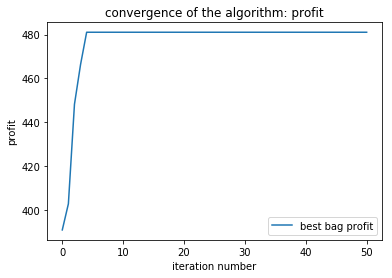

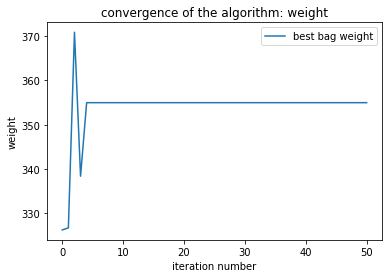

In [12]:
plt.figure()
plt.plot(best_bag_profit_list)
#plt.plot(bad_bag_profit_list)
plt.title('convergence of the algorithm: profit')
plt.xlabel('iteration number')
plt.ylabel('profit')
plt.legend(('best bag profit','worst bag profit'))
plt.show()

plt.figure()
plt.plot(best_bag_weight_list)
#plt.plot(bad_bag_weight_list)
plt.title('convergence of the algorithm: weight')
plt.xlabel('iteration number')
plt.ylabel('weight')
plt.legend(('best bag weight','worst bag weight'))
plt.show()

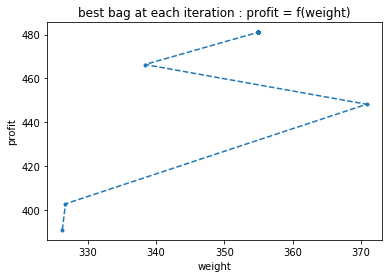

In [13]:
plt.figure()
plt.plot(best_bag_weight_list,best_bag_profit_list,'.--')
plt.xlabel('weight')
plt.ylabel('profit')
plt.title('best bag at each iteration : profit = f(weight)')
plt.show()